In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Open up the holistic CHROM dataframe from the json file

df_dir = 'results'
method = "CHROM"
df_filename = 'holistic_'+method+'.json'
df_path = os.path.join(df_dir, df_filename)

holistic_df = pd.read_json(df_path)

In [9]:
raw_diff = []
bad_instances = []

for instance in range(len(holistic_df)):
    # Fetch individual rows for K1_BPM_RAW and K2_BPM_RAW
    k1_row = holistic_df['K1_BPM_RAW'].to_list()[instance]
    k2_row = holistic_df['K2_BPM_RAW'].to_list()[instance]
    
    # Check for None and proceed with the difference calculation only if both rows are not None
    if k1_row is not None and k2_row is not None:
        try:
            diff = np.array(k1_row) - np.array(k2_row)
            raw_diff.append(diff)
        except Exception as e:
            print(f'Error with instance {instance}: {e}')
            bad_instances.append(instance)
            raw_diff.append(None)
    else:
        # Handle None types (e.g., append None, or an array of zeros, etc.)
        raw_diff.append(None)

Error with instance 5: operands could not be broadcast together with shapes (23,) (22,) 
Error with instance 7: operands could not be broadcast together with shapes (7,) (23,) 
Error with instance 8: operands could not be broadcast together with shapes (23,) (22,) 
Error with instance 9: operands could not be broadcast together with shapes (23,) (22,) 
Error with instance 11: operands could not be broadcast together with shapes (22,) (23,) 
Error with instance 13: operands could not be broadcast together with shapes (22,) (23,) 
Error with instance 14: operands could not be broadcast together with shapes (22,) (23,) 
Error with instance 19: operands could not be broadcast together with shapes (7,) (23,) 
Error with instance 22: operands could not be broadcast together with shapes (22,) (23,) 
Error with instance 23: operands could not be broadcast together with shapes (23,) (22,) 
Error with instance 27: operands could not be broadcast together with shapes (23,) (22,) 
Error with insta

In [11]:
print(bad_instances)

[5, 7, 8, 9, 11, 13, 14, 19, 22, 23, 27, 29, 31, 33, 36, 39, 47, 48, 50, 54, 56, 60, 74, 75, 80, 82, 84, 86, 87, 94]


### Question: Is there much of a difference between cameras?

In [4]:
def make_clustered_column(df,metric,segmented = False):
    if segmented:
        k1_metric = 'K1_'+metric+'_SEGMENTED'
        k2_metric = 'K2_'+metric+'_SEGMENTED'
    else:
        k1_metric = 'K1_'+metric+'_RAW'
        k2_metric = 'K2_'+metric+'_RAW'
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(20, 6))

    # Number of clusters
    n_instances = len(df['INSTANCE'])

    # Set the positions and width for the bars
    bar_width = 0.35
    index = np.arange(n_instances)

    # Create bars
    try:
        bar1 = plt.bar(index, df[k1_metric], bar_width, label=k1_metric, alpha=0.8)
    except Exception as e:
        print(e)
        print('No data for '+k1_metric)

    try:
        bar2 = plt.bar(index + bar_width, df[k2_metric], bar_width, label=k2_metric, alpha=0.8)
    except Exception as e:
        print(e)
        print('No data for '+k2_metric)

    # Add some text for labels, title, and axes ticks
    plt.xlabel('Instance')
    plt.ylabel('RMSE (BPM)')
    plt.title('Clustered Column Graph for Each Instance')
    plt.xticks(index + bar_width / 2, df['INSTANCE'],rotation = 90)  # Position the instance labels in the center of the clustered bars

    # Adding the legend and showing the plot
    plt.legend()

    # Display the graph
    plt.tight_layout()
    plt.show()
    return fig,ax

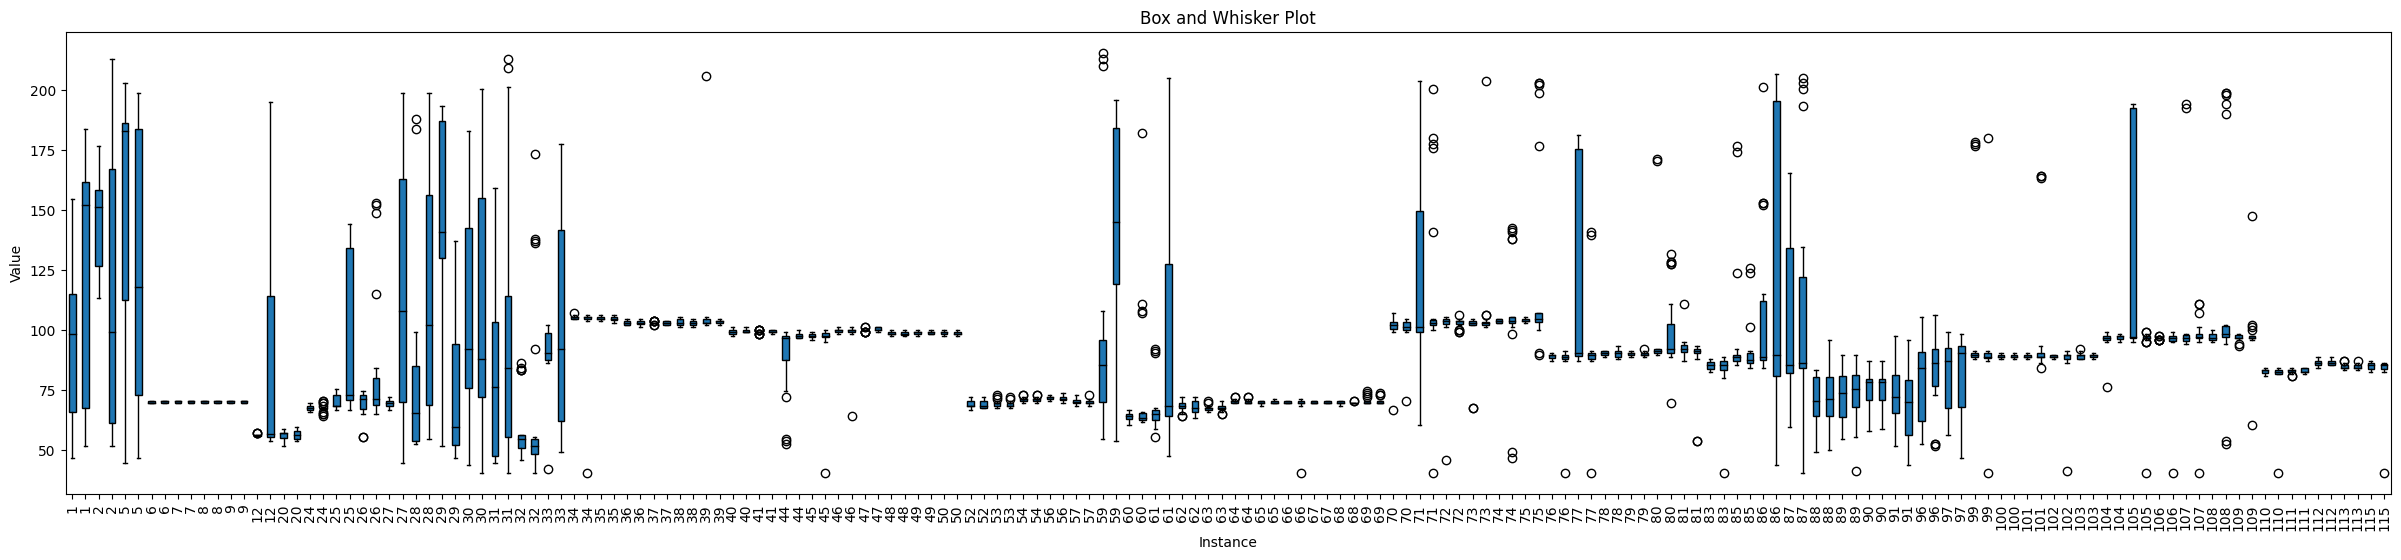

In [31]:
# Sample data for demonstration
# holistic_raw_df = pd.DataFrame({
#     'INSTANCE': ['A', 'B', 'C'],
#     'K1_BPM_RAW': [[1, 2, 3], [2, 3, 4], [3, 4, 5]],
#     'K2_BPM_RAW': [[4, 5, 6], [5, 6, 7], [6, 7, 8]]
# })

# Prepare the data, remove rows where either column has None
filtered_df = holistic_raw_df.dropna(subset=['K1_BPM_RAW', 'K2_BPM_RAW'])

# Flatten and interleave K1 and K2 data
all_data = []
for _, row in filtered_df.iterrows():
    if row['K1_BPM_RAW'] is not None and row['K2_BPM_RAW'] is not None:
        all_data.append(row['K1_BPM_RAW'])
        all_data.append(row['K2_BPM_RAW'])

# Prepare labels
labels = [f"{instance}" for i, instance in enumerate([val for pair in zip(filtered_df['INSTANCE'], filtered_df['INSTANCE']) for val in pair]
    )
]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(30, 6))

# Create the box and whisker plot
boxplot_elements = ax.boxplot(all_data, patch_artist=True, labels=labels)

# Labeling and titling
ax.set_title('Box and Whisker Plot')
ax.set_xlabel('Instance')
ax.set_ylabel('Value')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Customizing the whiskers, caps, etc.
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(boxplot_elements[element], color='black')

# Show the plot
plt.show()

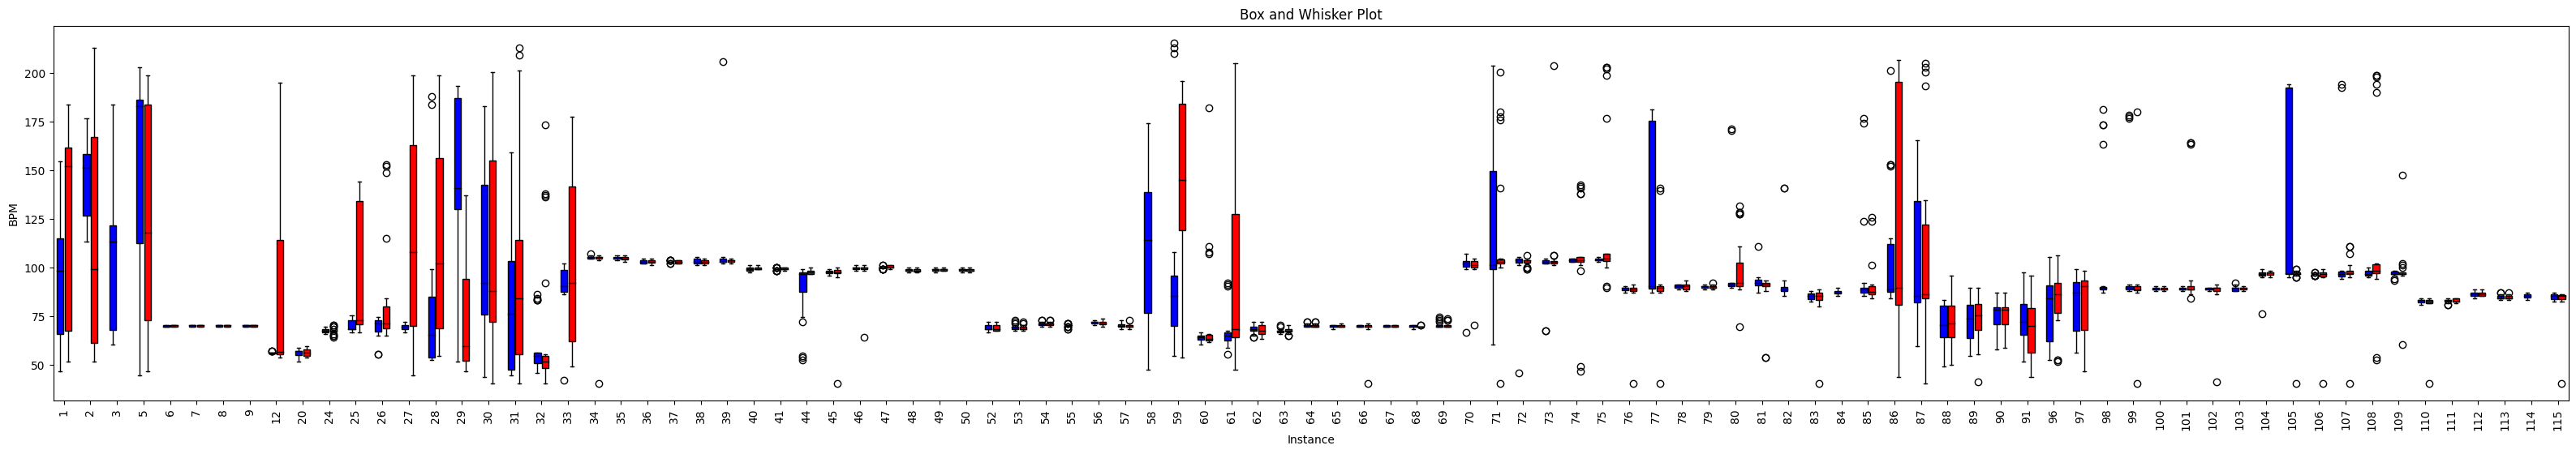

In [43]:
# Sample DataFrame
df = holistic_raw_df

# Prepare the data
k1_data = []
k2_data = []
labels = df['INSTANCE'].tolist()

# Filter out None values and prepare data for boxplot
for i, row in df.iterrows():
    if row['K1_BPM_RAW'] is not None:
        k1_data.append(row['K1_BPM_RAW'])
    else:
        k1_data.append([])
        
    if row['K2_BPM_RAW'] is not None:
        k2_data.append(row['K2_BPM_RAW'])
    else:
        k2_data.append([])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(40, 6))

# Calculate positions with reduced spacing (0.8 instead of 1)
n = len(labels)
offset = 0.6  # Smaller value brings plots closer
positions_k1 = np.array(range(0, n*2, 2))
positions_k2 = positions_k1 + offset

# Create the box and whisker plots
boxplot_elements1 = ax.boxplot(k1_data, positions=positions_k1, patch_artist=True)
boxplot_elements2 = ax.boxplot(k2_data, positions=positions_k2, patch_artist=True)

# Labeling and titling
ax.set_title('Box and Whisker Plot')
ax.set_xlabel('Instance')
ax.set_ylabel('BPM')

# Rotate x-axis labels and adjust ticks
ax.set_xticks((positions_k1 + positions_k2) / 2)
ax.set_xticklabels(labels, rotation=90)

# Customizing the whiskers, caps, etc.
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(boxplot_elements1[element], color='black')
    plt.setp(boxplot_elements2[element], color='black')
    
for patch in boxplot_elements1['boxes']:
    patch.set(facecolor='blue')

for patch in boxplot_elements2['boxes']:
    patch.set(facecolor='red')

# Show the plot
plt.show()

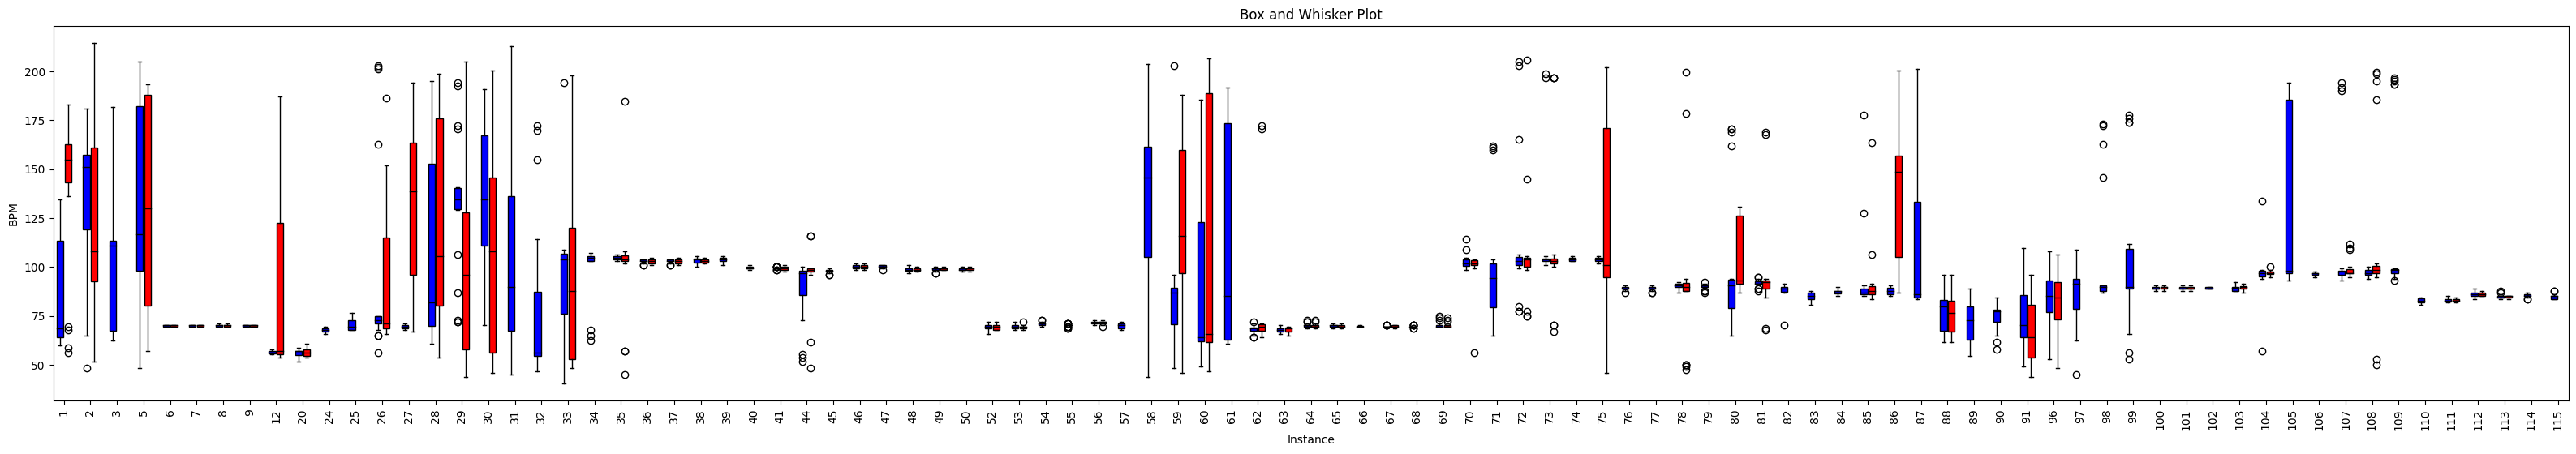

In [45]:
# Sample DataFrame
df = holistic_segmented_df

# Prepare the data
k1_data = []
k2_data = []
labels = df['INSTANCE'].tolist()

# Filter out None values and prepare data for boxplot
for i, row in df.iterrows():
    if row['K1_BPM_SEGMENTED'] is not None:
        k1_data.append(row['K1_BPM_SEGMENTED'])
    else:
        k1_data.append([])
        
    if row['K2_BPM_SEGMENTED'] is not None:
        k2_data.append(row['K2_BPM_SEGMENTED'])
    else:
        k2_data.append([])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(40, 6))

# Calculate positions with reduced spacing (0.8 instead of 1)
n = len(labels)
offset = 0.6  # Smaller value brings plots closer
positions_k1 = np.array(range(0, n*2, 2))
positions_k2 = positions_k1 + offset

# Create the box and whisker plots
boxplot_elements1 = ax.boxplot(k1_data, positions=positions_k1, patch_artist=True)
boxplot_elements2 = ax.boxplot(k2_data, positions=positions_k2, patch_artist=True)

# Labeling and titling
ax.set_title('Box and Whisker Plot')
ax.set_xlabel('Instance')
ax.set_ylabel('BPM')

# Rotate x-axis labels and adjust ticks
ax.set_xticks((positions_k1 + positions_k2) / 2)
ax.set_xticklabels(labels, rotation=90)

# Customizing the whiskers, caps, etc.
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(boxplot_elements1[element], color='black')
    plt.setp(boxplot_elements2[element], color='black')
    
for patch in boxplot_elements1['boxes']:
    patch.set(facecolor='blue')

for patch in boxplot_elements2['boxes']:
    patch.set(facecolor='red')

# Show the plot
plt.show()

In [47]:
holistic_raw_df['K2_BPM_RAW']

0      [51.85546875, 173.14453125, 92.28515625, 149.4...
1      [53.61328125, 54.4921875, 173.14453125, 176.66...
2                                                   None
4      [130.078125, 132.71484375, 137.109375, 188.085...
5      [70.3125, 70.3125, 69.43359375, 69.43359375, 6...
                             ...                        
110    [84.375, 84.375, 84.375, 84.375, 84.375, 83.49...
111    [86.1328125, 86.1328125, 85.25390625, 86.13281...
112    [85.25390625, 84.375, 84.375, 84.375, 84.375, ...
113                                                 None
114    [40.4296875, 86.1328125, 86.1328125, 86.132812...
Name: K2_BPM_RAW, Length: 95, dtype: object

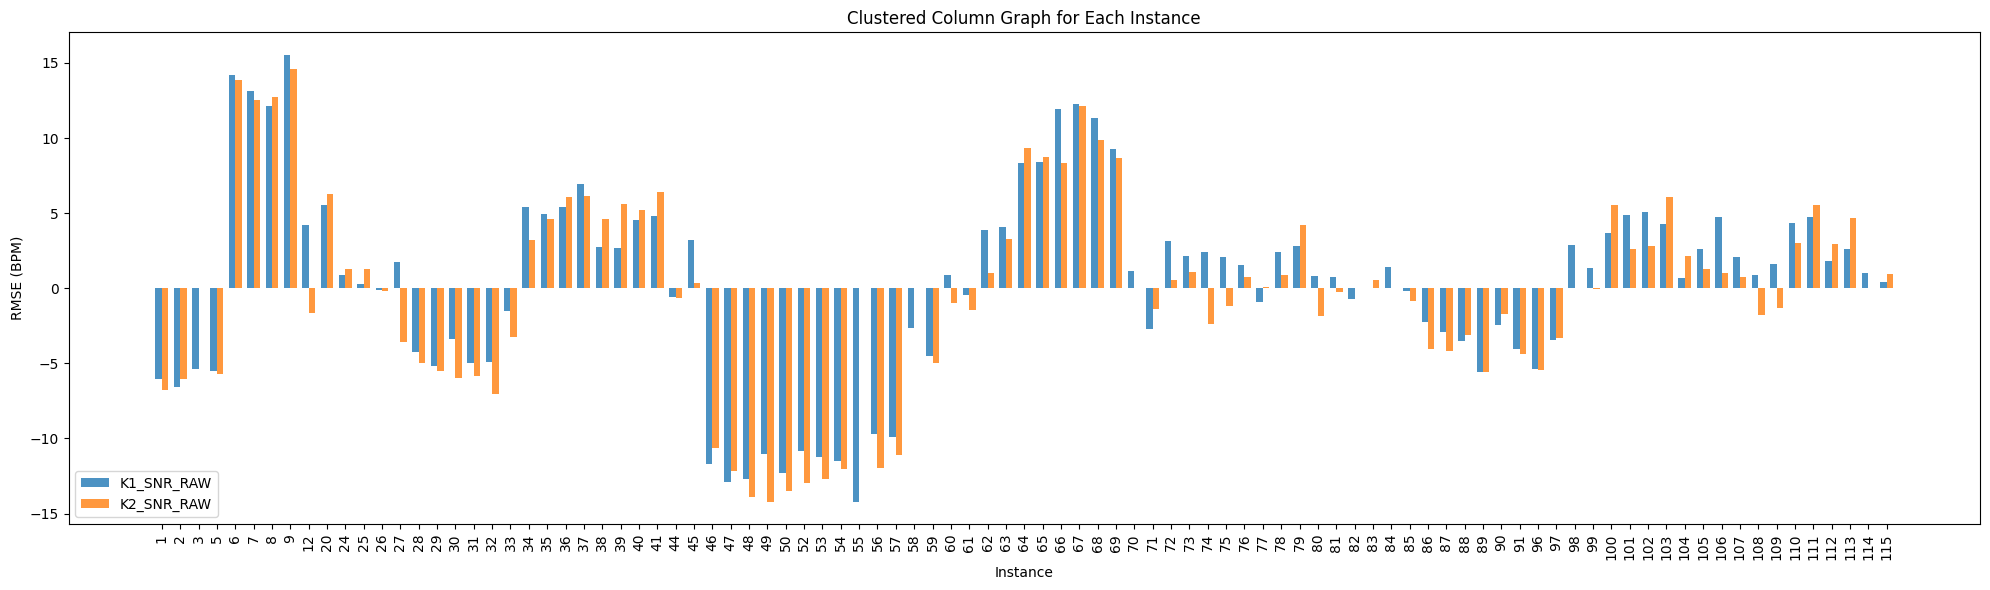

In [5]:
fig,ax = make_clustered_column(holistic_raw_df,'SNR',segmented = False)

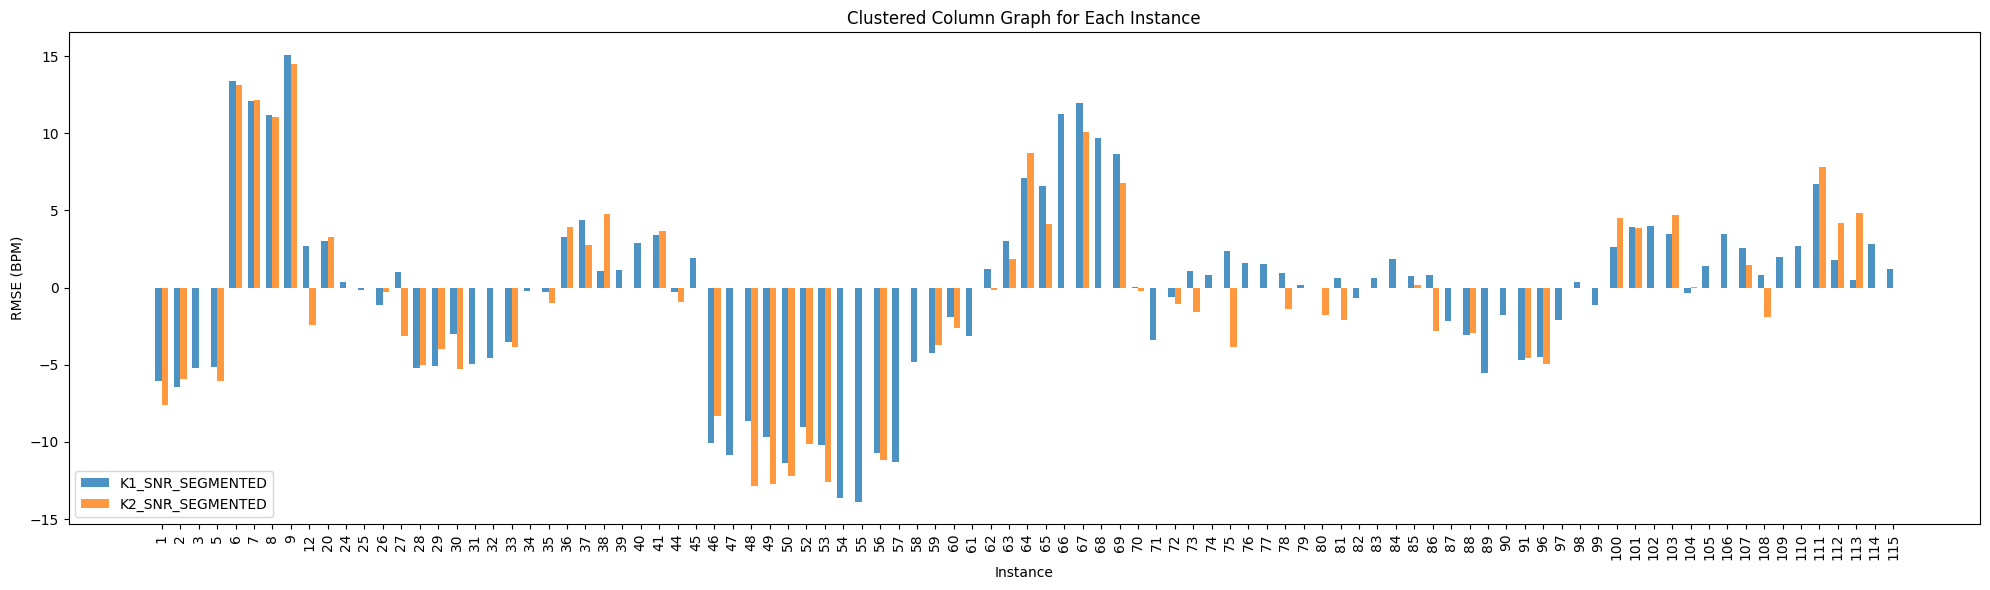

In [6]:
fig,ax = make_clustered_column(holistic_segmented_df,'SNR',segmented = True)